## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [343]:
import pandas as pd
import seaborn as sns

In [344]:
student_df = pd.read_csv("students-data.csv", sep=';')
print(student_df.shape)
student_df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [169]:
'''Since the dataset has 33 columns. observing the each column manually was possible verifying the present
values with the source site description, didnt find any missing values as such.'''
student_df.index.name = 'number'# Naming the index column
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [170]:
#Non numerical means categorical columns
col = student_df.select_dtypes(include='object').columns
col

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [171]:
student_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [172]:
from sklearn.preprocessing import LabelEncoder
data_tranformed = student_df[:]
for y in col.values: # col holds the categorical columns
       print("The string type features are  : " + y)
       le = preprocessing.LabelEncoder()
       le.fit(student_df[y].unique()) # fitting the label encoder
       data_tranformed[y] = le.transform(student_df[y])#label encoded data

The string type features are  : school
The string type features are  : sex
The string type features are  : address
The string type features are  : famsize
The string type features are  : Pstatus
The string type features are  : Mjob
The string type features are  : Fjob
The string type features are  : reason
The string type features are  : guardian
The string type features are  : schoolsup
The string type features are  : famsup
The string type features are  : paid
The string type features are  : activities
The string type features are  : nursery
The string type features are  : higher
The string type features are  : internet
The string type features are  : romantic


In [173]:
data_tranformed.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [174]:
data_tranformed['G1'] = data_tranformed['G1'].ge(10).astype(int)
data_tranformed['G2'] = data_tranformed['G2'].ge(10).astype(int)
data_tranformed['G3'] = data_tranformed['G3'].ge(10).astype(int)
print('Unique values in G1 ', data_tranformed.G1.unique())
print('Unique values in G2 ', data_tranformed.G2.unique())
print('Unique values in G3 ', data_tranformed.G3.unique())

Unique values in G1  [0 1]
Unique values in G2  [0 1]
Unique values in G3  [0 1]


In [175]:
data_tranformed.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [180]:
X = data_tranformed.drop(['G3'], axis=1)
y = data_tranformed['G3']

number
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int32

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

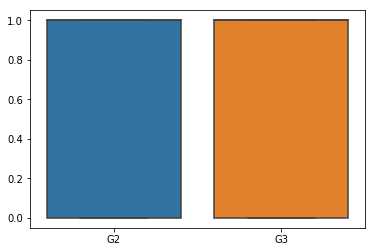

In [202]:
sns.boxplot(data=data_tranformed[['G2','G3']]);

In [196]:
print('values greater than or equal to 10 for G2', data_tranformed[data_tranformed.G2 == 1].G2.count()) 
print('values greater than or equal to 10 for G3', data_tranformed[data_tranformed.G3 == 1].G3.count()) 

values greater than or equal to 10 for G2 249
values greater than or equal to 10 for G3 265



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

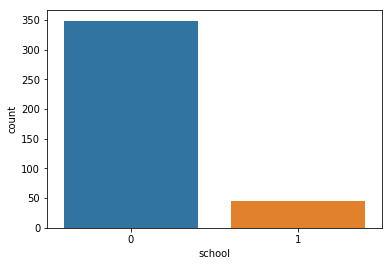

In [198]:
sns.countplot(x='school',data=data_tranformed);

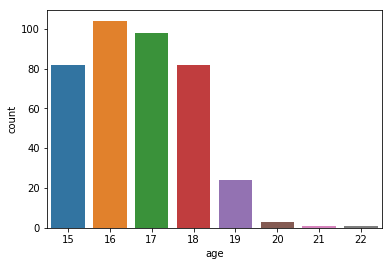

In [199]:
sns.countplot(x='age', data= data_tranformed)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24,random_state=1) # Split into 70, 30 train test

In [207]:
print('size of training set ', X_train.shape)
print('size of testing set', X_test.shape)

size of training set  (300, 32)
size of testing set (95, 32)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [215]:
# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


test_accuracy = model.score(X_test, y_test)
print('test accuracy ', test_accuracy)
train_accuracy = model.score(X_train, y_train)
print('train accuracy ',train_accuracy)
print(metrics.confusion_matrix(y_test, y_predict))
print('model accuracy ', metrics.accuracy_score(y_test, y_predict))
print('model f1 score ', metrics.f1_score(y_test, y_predict))

test accuracy  0.9157894736842105
train accuracy  0.94
[[25  3]
 [ 5 62]]
model accuracy  0.9157894736842105
model f1 score  0.9393939393939394


# Naive bayes with Iris data

### Import Iris.csv

In [273]:
import numpy as np
iris_df = pd.read_csv('Iris.csv', )
print(iris_df.isna().sum())
iris_df.fillna(0, inplace=True)

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


In [288]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,151,5.9,0.0,0.0,0.0,Iris-virginica
151,152,0.0,0.0,0.0,1.8,Iris-virginica


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [274]:
X = iris_df.drop('Species', axis=1)
y = iris_df[['Species']]

### Find the distribution of target variable (Class)

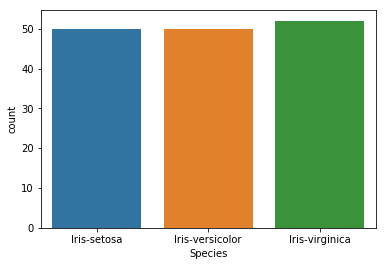

In [275]:
sns.countplot(x='Species', data=iris_df);

### Plot the distribution of target variable using histogram

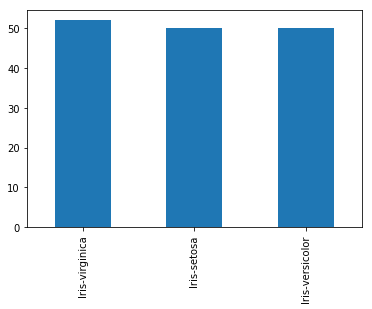

In [276]:
pd.value_counts(iris_df["Species"]).plot(kind="bar");

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

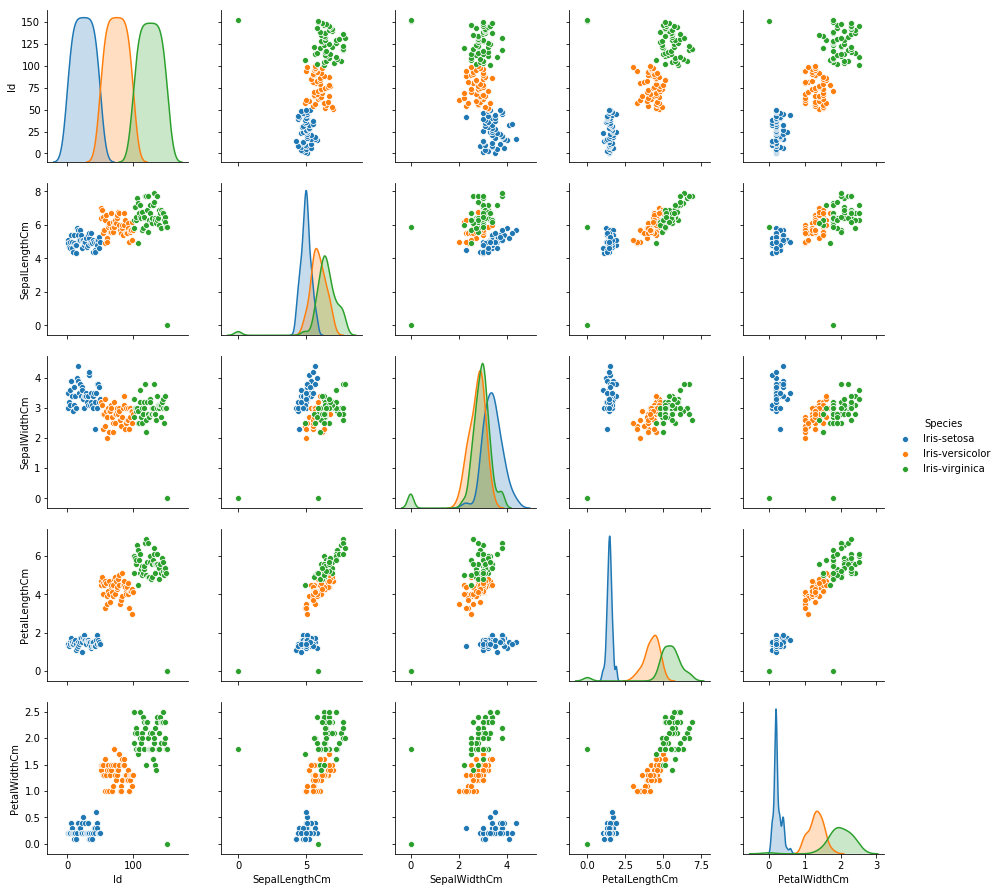

In [277]:
sns.pairplot(iris_df, diag_kind='kde', hue='Species')

In [278]:
'''My observations
1. SepalLength , Petal length and Petal width are clearly large for Iris-setosa
2. Iris-setosa has the smaller sepalwidth
3. most of the distributions are clearly distinct in terms of sizes of sepal,petal for all three species
4. Iris-virginica distributions shows it is higher on all length and width compared to other two species'''

'My observations\n1. SepalLength , Petal length and Petal width are clearly large for Iris-setosa\n2. Iris-setosa has the smaller sepalwidth\n3. most of the distributions are clearly distinct in terms of sizes of sepal,petal for all three species\n4. Iris-virginica distributions shows it is higher on all length and width compared to other two species'

### Summary Statistics and explain insights for at least 2 variables

In [279]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.5,114.25,152.0
SepalLengthCm,152.0,5.805263,0.949366,0.0,5.10,5.8,6.40,7.9
SepalWidthCm,152.0,3.013816,0.554458,0.0,2.80,3.0,3.30,4.4
PetalLengthCm,152.0,3.709211,1.804606,0.0,1.50,4.3,5.10,6.9
PetalWidthCm,152.0,1.194737,0.765895,0.0,0.30,1.3,1.80,2.5


In [280]:
'''Observations
PetalWidth, petallength show non normal distribution with mean is less than the median
may hold outliers
the std for petal length shows high standard diveation '''

'Observations\nPetalWidth, petallength show non normal distribution with mean is less than the median\nmay hold outliers'

### Correlation among all variables and give your insights

In [282]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.539500,-0.427175,0.793490,0.864447
SepalLengthCm,0.539500,1.000000,0.145802,0.816560,0.668652
SepalWidthCm,-0.427175,0.145802,1.000000,-0.167316,-0.246073
PetalLengthCm,0.793490,0.816560,-0.167316,1.000000,0.936151
PetalWidthCm,0.864447,0.668652,-0.246073,0.936151,1.000000


In [ ]:
'''
1. Petal Width and length shows high correlation 0f 0.93
2. sepal length and petal length shows another better relation about 0.81'''

### Split data in Training and Validation in 80:20

In [289]:
X = iris_df.drop('Species', axis=1)
y = iris_df[['Species']] 

### Do Feature Scaling

In [290]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())

### Train and Fit NaiveBayes Model

In [339]:
import warnings
warnings.simplefilter(action="ignore")
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=12)

In [340]:
std_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [341]:
pred_test_std = std_clf.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [342]:
# summarize the fit of the model
print(metrics.classification_report(y_test, pred_test_std))
print(metrics.confusion_matrix(y_test, pred_test_std))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

      micro avg       0.97      0.97      0.97        31
      macro avg       0.97      0.97      0.97        31
   weighted avg       0.97      0.97      0.97        31

[[11  0  0]
 [ 0  9  1]
 [ 0  0 10]]
